In [32]:
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import colorcet as cc

In [4]:
# Load pre-stored data
data_store = pd.HDFStore('instacart.h5')
full_dataset = data_store['full_dataset']
data_store.close()

In [5]:
small_dataset = full_dataset.sample(10000)

In [6]:
small_dataset

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,aisle,department
13962350,88403,7,6,13,5.0,4,0,Sauvignon Blanc,white wines,alcohol
14046602,88950,4,3,8,8.0,2,1,Organic Baby Spinach,packaged vegetables fruits,produce
15420465,97546,12,2,13,5.0,7,1,Cheddar Puffs,chips pretzels,snacks
3833487,24358,11,6,10,7.0,5,0,Organic Italian Parsley Bunch,fresh herbs,produce
12642005,79986,2,2,14,11.0,10,0,Organic Cucumber,fresh vegetables,produce
...,...,...,...,...,...,...,...,...,...,...
4938409,31465,2,6,13,3.0,14,0,Maple Almond Butter,spreads,pantry
9013238,57087,9,5,0,23.0,1,1,Bean & Cheese Burrito,frozen meals,frozen
10911719,69130,9,5,11,10.0,15,1,Sweet Potato Yam,fresh vegetables,produce
5748499,36596,40,5,15,5.0,1,1,Bag of Organic Bananas,fresh fruits,produce


In [7]:
small_dataset.head(7)

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,aisle,department
13962350,88403,7,6,13,5.0,4,0,Sauvignon Blanc,white wines,alcohol
14046602,88950,4,3,8,8.0,2,1,Organic Baby Spinach,packaged vegetables fruits,produce
15420465,97546,12,2,13,5.0,7,1,Cheddar Puffs,chips pretzels,snacks
3833487,24358,11,6,10,7.0,5,0,Organic Italian Parsley Bunch,fresh herbs,produce
12642005,79986,2,2,14,11.0,10,0,Organic Cucumber,fresh vegetables,produce
29805701,189331,7,6,8,20.0,1,0,Whole Tellicherry Peppercorns,spices seasonings,pantry
819828,5328,40,5,11,5.0,7,1,Grain Free Turkey & Salmon Formula Cat Food,cat food care,pets


In [8]:
small_dataset['days_since_prior_order'] = small_dataset['days_since_prior_order'].fillna(-1)

In [9]:
small_dataset['days_since_prior_order'] = small_dataset['days_since_prior_order'].apply(lambda x: int(x))

In [10]:
small_dataset.dtypes

user_id                    int64
order_number               int64
order_dow                  int64
order_hour_of_day          int64
days_since_prior_order     int64
add_to_cart_order          int64
reordered                  int64
product_name              object
aisle                     object
department                object
dtype: object

In [11]:
dow_hrd = small_dataset[['order_dow','order_hour_of_day']].drop_duplicates()

In [12]:
dow_hrd['time_x'] = np.sin(dow_hrd['order_hour_of_day']/12*np.pi)
dow_hrd['time_y'] = np.cos(dow_hrd['order_hour_of_day']/12*np.pi)

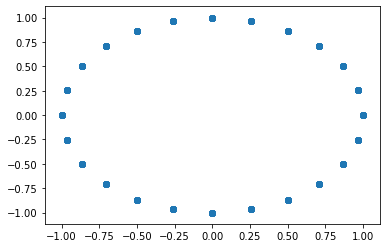

In [13]:
plt.scatter(dow_hrd['time_x'],dow_hrd['time_y'])

In [14]:
dow_hrd.head()

,order_dow,order_hour_of_day,time_x,time_y
13962350,6,13,-0.258819,-0.965926
14046602,3,8,0.866025,-0.500000
15420465,2,13,-0.258819,-0.965926
3833487,6,10,0.500000,-0.866025
12642005,2,14,-0.500000,-0.866025


In [15]:
small_dataset = small_dataset.merge(dow_hrd)

In [16]:
small_dataset.sample(10)

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,aisle,department,time_x,time_y
7317,77754,4,4,15,30,1,0,Large White Eggs,eggs,dairy eggs,-7.071068e-01,-0.707107
9713,2864,1,0,21,-1,1,0,Organic Fat Free Milk,milk,dairy eggs,-7.071068e-01,0.707107
3527,202986,1,0,14,-1,7,0,Sour Cream & Onion Potato Chips,chips pretzels,snacks,-5.000000e-01,-0.866025
613,111395,4,5,11,8,9,1,Toilet Paper Double Rolls - 24 CT,paper goods,household,2.588190e-01,-0.965926
3262,15170,2,3,15,1,5,0,Extralean Ground Turkey Breast,packaged poultry,meat seafood,-7.071068e-01,-0.707107
7609,127820,46,4,22,5,1,0,Kumato Tomatoes,fresh vegetables,produce,-5.000000e-01,0.866025
5863,114991,2,2,12,30,4,1,Three Cheese Italian Sauce,pasta sauce,dry goods pasta,1.224647e-16,-1.000000
9588,129353,7,6,23,26,8,1,2% Reduced Fat Milk,milk,dairy eggs,-2.588190e-01,0.965926
3038,47906,4,1,12,9,12,1,Pomegranate Limeade Quencher,refrigerated,beverages,1.224647e-16,-1.000000
1750,189302,16,0,9,7,24,1,Natural Bliss Salted Caramel Flavor All-Natura...,cream,dairy eggs,7.071068e-01,-0.707107


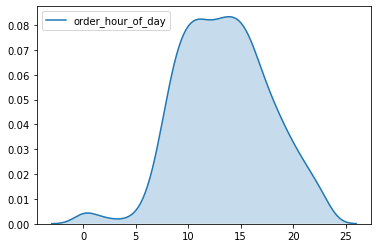

In [17]:
sns.kdeplot(small_dataset['order_hour_of_day'],shade=True,bw=1)

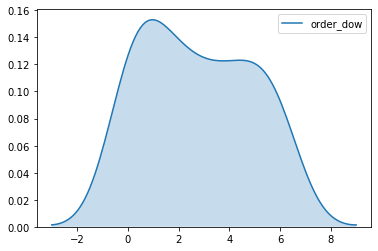

In [18]:
sns.kdeplot(small_dataset['order_dow'],shade=True,bw=1)

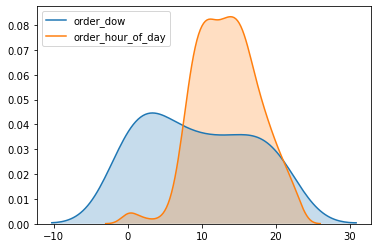

In [19]:
sns.kdeplot(small_dataset['order_dow']*(24/7),shade=True,bw=24/7)
sns.kdeplot(small_dataset['order_hour_of_day'],shade=True,bw=1)

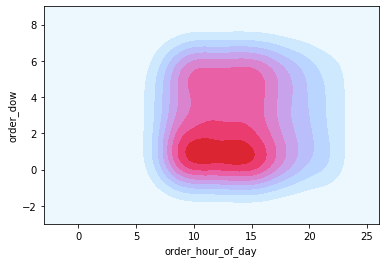

In [20]:
sns.kdeplot(small_dataset['order_hour_of_day'],small_dataset['order_dow'],shade=True,shade_lowest=True,bw=1,cmap=cc.cm.CET_L19)

In [21]:
from gensim.test.utils import get_tmpfile

In [22]:
from gensim.models import Word2Vec
from gensim.models import Phrases

In [23]:
from gensim.models import KeyedVectors

In [ ]:
common_texts = small_dataset['product_name'].apply(lambda x: x.split(' '))
common_texts.head(1)

In [46]:
common_texts.value_counts()

[Banana]                                      130
[Bag, of, Organic, Bananas]                   119
[Organic, Strawberries]                        76
[Organic, Hass, Avocado]                       70
[Organic, Baby, Spinach]                       68
                                             ... 
[Raisin, Bran, Crunch, Cereal]                  1
[Hot, (101305,, 101352), Italian, Sausage]      1
[Scrub, Singles, Bathroom]                      1
[Chicken, Sticks]                               1
[Home, Style, Blue, Cheese, Dressing]           1
Name: product_name, Length: 4661, dtype: int64

In [ ]:
bigram_transformer = Phrases(common_texts)
model = Word2Vec(bigram_transformer[common_texts], min_count=1)

In [ ]:
model.wv

In [ ]:
path = get_tmpfile('wordvectors.kv')

In [ ]:
model.wv.save(path)

In [ ]:
wv = KeyedVectors.load(path,mmap='r')

In [ ]:
wv

In [ ]:
del model

In [ ]:
del common_texts
del bigram_transformer

In [38]:
reducer = umap.UMAP(min_dist=0.0)

In [39]:
reduced = reducer.fit_transform(wv.vectors)

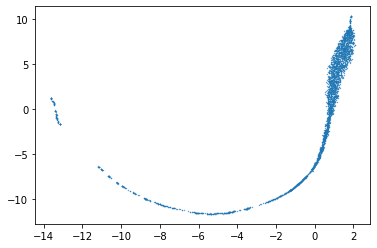

In [42]:
plt.scatter(reduced[:,0],reduced[:,1], s=0.1)